# Aula 02 - Introdução ao PyTorch – Código

## ⭐️ Objetivo:
- Introduzir um código pode ser usado como base para aprendizado de máquina, abordando desde o pré-processamento de dados até a construção e avaliação de um modelo de rede neural simples usando PyTorch.

- Será apresentado o passo a passo de como carregar, preparar, treinar e avaliar um modelo de rede neural simples em Python utilizando as bibliotecas Pandas, NumPy, Scikit-learn e PyTorch.

## 🧰 Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 🔖 Explicação

| Biblioteca | Finalidade |
|-----------|------------|
| `pandas` | Manipulação e análise de dados (carregar CSVs, tratar dados) |
| `numpy` | Trabalho com arrays numéricos |
| `torch` | Construção e treinamento de redes neurais |
| `sklearn` | Divisão de conjuntos de treino/teste |

## 1️⃣ Carregamento do Dataset

In [3]:
df = pd.read_csv("dataset/dataset_sudeste_simples_realista_outliers-2k.csv")
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1982 non-null   float64
 2   renda      1983 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       1970 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


### Explicação:

- Carrega os dados de um arquivo `.csv` para dentro de um DataFrame (`df`) usando `pandas`.
- O caminho `"dataset/dataset_sudeste_simples_realista_outliers-1k.csv"` deve apontar corretamente para o local onde o dataset está salvo.

### Dica:




Use `df.head()` para visualizar as primeiras linhas do dataset.

## 2️⃣ Criação da Coluna Alvo (`feedback_Bom`)

##### 🐍 Código - Preenchendo os campos vazios

In [4]:
df['feedback'] = df['feedback'].fillna("Desconhecido")

##### 🐍 Código - Criando a nova coluna

- Contem o valor 1 quando o feebback for bom
- Contem o valor 0 quando o feedback não for bom

In [5]:
df['feedback_Bom'] = (df['feedback'] == 'Bom').astype(int)

##### 🐍 Código - Exibindo as primeiras linhas

In [5]:
df.head(5)

,id,idade,renda,cidade,categoria,nota,feedback,feedback_Bom
0,1,36.0,7038.01,Rio de Janeiro,A,2.9,Bom,1
1,2,NaN,9306.04,Belo Horizonte,B,5.1,Regular,0
2,3,35.0,5148.47,Vitória,B,9.4,Ruim,0
3,4,16.0,12597.91,Belo Horizonte,B,1.8,Regular,0
4,5,41.0,11057.24,Vitória,B,0.3,Desconhecido,0


##### 🔖 Explicações

- Cria uma nova coluna chamada `feedback_Bom`.
- Transforma a variável categórica `'feedback'` (valores como `'Bom'`, `'Ruim'`, etc.) em uma variável binária:
  - `1` se for `'Bom'`
  - `0` caso contrário- Cria uma nova coluna chamada `feedback_Bom`. 

##### 🚨 Por que isso é necessário?

- Modelos de classificação binária trabalham com saídas numéricas (geralmente 0 ou 1). 
- Essa transformação prepara o target para o modelo.

## 3️⃣ Tratamento de Valores Ausentes

##### 🐍 Código - Preparando o dataset

-  Imputando valores no campos vazios (NaN)

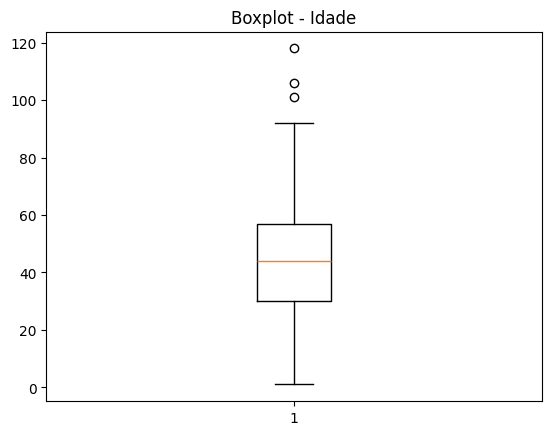

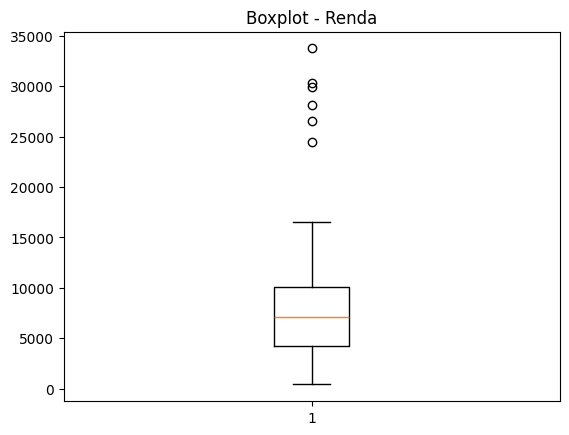

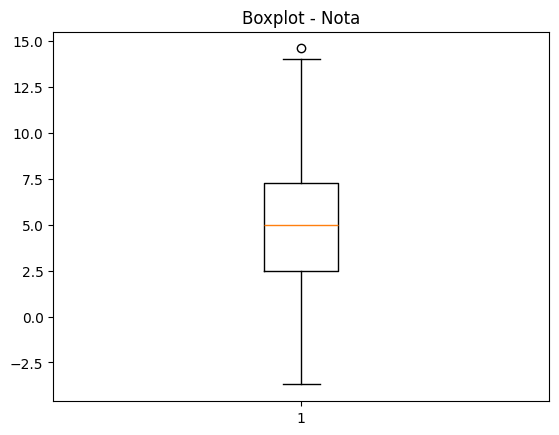

In [7]:
# Verificar outliers 

plt.boxplot(df['idade'].dropna())
plt.title("Boxplot - Idade")
plt.show()

plt.boxplot(df['renda'].dropna())
plt.title("Boxplot - Renda")
plt.show()

plt.boxplot(df['nota'].dropna())
plt.title("Boxplot - Nota")
plt.show()

# Todas as variáveis tiveram outliers. Assim, a opção de tratamento para dados faltantes foi preencher com a mediana 

In [8]:
df['cidade'] = df['cidade'].fillna("Desconhecido")
df['categoria'] = df['categoria'].fillna("Desconhecido")
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda'] = df['renda'].fillna(df['renda'].median())
df['nota']  = df['nota'].fillna(df['nota'].median())

##### 🐍 Código - Imprimindo as informações do dataset


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2000 non-null   int64  
 1   idade         2000 non-null   float64
 2   renda         2000 non-null   float64
 3   cidade        2000 non-null   object 
 4   categoria     2000 non-null   object 
 5   nota          2000 non-null   float64
 6   feedback      2000 non-null   object 
 7   feedback_Bom  2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


In [8]:
df.isnull().sum()

id              0
idade           0
renda           0
cidade          0
categoria       0
nota            0
feedback        0
feedback_Bom    0
dtype: int64

##### 🔖 Explicações

- Preenche valores ausentes (`NaN`) com estratégias diferentes por tipo:
  - Para texto preenche com `"Desconhecido"`
    - Cidade 
    - Categoria
  - Para números:
    - `idade`: mediana
    - `renda`: média
    - `nota`: mediana

##### 🚨 Por que tratar valores faltantes?

- Algoritmos de machine learning geralmente não lidam bem com dados faltantes. 
- É necessário tratá-los antes do treinamento.

### 3.1 Salvando o dataset

In [10]:
df.to_csv("dataset-fase1/dataset_sudeste_simples_realista_outliers-2k-median-pytorch.csv", index=False)

## 4️⃣ Separação entre Features e Target + Divisão Treino/Teste

##### 🐍 Código

In [11]:
features = df[['idade', 'renda', 'nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

# Os valores não foram normalizados 

In [12]:
features.head(5)

,idade,renda,nota
0,39.0,5112.57,4.5
1,64.0,9510.34,5.4
2,61.0,8970.80,5.0
3,61.0,8526.52,1.8
4,53.0,3531.76,5.5


In [13]:
target.head(5)

0    1
1    0
2    0
3    1
4    1
Name: feedback_Bom, dtype: int64

In [14]:
X_train.head(5)

,idade,renda,nota
836,52.0,4112.45,2.4
575,57.0,5791.84,9.6
557,64.0,3131.51,6.1
1235,38.0,6644.51,8.4
1360,25.0,5976.68,6.7


In [15]:
y_train.head(5)

836     1
575     0
557     1
1235    1
1360    0
Name: feedback_Bom, dtype: int64

In [16]:
X_test.head(5)

,idade,renda,nota
1860,47.0,2597.15,7.3
353,57.0,3110.23,4.2
1333,23.0,6502.52,8.5
905,47.0,6377.39,5.7
1289,30.0,5432.48,3.1


In [17]:
y_test.head(5)

1860    0
353     1
1333    0
905     0
1289    1
Name: feedback_Bom, dtype: int64

##### 🔖 Explicações

- Usar apenas as colunas numéricas "idade", "renda", "nota" como features
- `features`: são as variáveis explicativas (entradas do modelo)
- `target`: é o valor a ser previsto (saída do modelo)
- `test_size=0.3`: define proporção de dados para teste.
- Usa-se `train_test_split` para dividir os dados em:
  - **70% para treino**
  - **30% para teste**
  - Um para treinamento do modelo (X_train, y_train)
  - Outro para teste do modelo (X_test, y_test)
- Essa divisão é feita aleatoriamente , mas usando `random_state=42`, garantimos que sempre que executarmos o código, a divisão será a mesma.


**Dica**
- Se você omitir o parâmetro `test_size`, o padrão será **0.25**.
- Mas é recomendado definir explicitamente para manter controle sobre a proporção.

**Depois da divisão**
- `X_train`: [70% das linhas, colunas: idade, renda, nota]
- `y_train`: [70% das linhas, coluna: feedback_Bom]

- `X_test`:  [30% das linhas, colunas: idade, renda, nota]
- `y_test`:  [30% das linhas, coluna: feedback_Bom]

## 5️⃣ Conversão para Tensores PyTorch

##### 🐍 Código

In [18]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

##### 🔖 Explicações

Esse bloco de código converte os dados em formato NumPy (ou arrays) para tensores do PyTorch , que são necessários para trabalhar com modelos criados no PyTorch.

**Parte 1: X_train.values**
- X_train é um DataFrame do Pandas com as features (ex: idade, renda, nota).
- .values extrai apenas os valores numéricos como um array NumPy.

**Parte 2: torch.tensor(...)**
- Cria um tensor do PyTorch a partir do array NumPy.
- Um tensor é a estrutura básica usada no PyTorch para representar dados e realizar operações matemáticas.

**Parte 3: dtype=torch.float32**
- Define o tipo de dado do tensor como float32 .
- Por padrão, o PyTorch usa float32, mas é bom especificar para garantir compatibilidade com modelos e operações.

  
**Parte 4: .view(-1, 1)**
- Apenas usado em y_train e y_test.
- Transforma um vetor 1D (ex: [1, 0, 1]) em uma matriz coluna 2D (ex: [[1], [0], [1]]).
- Isso é necessário porque o modelo do PyTorch espera saídas no formato (batch_size, 1) , ou seja, uma coluna por amostra.

**Explicação do .view(-1, 1):**
- -1 significa "inferir automaticamente o tamanho dessa dimensão"
- 1 significa que queremos 1 coluna

- Converte os dados em tensores do PyTorch (formato exigido pelo framework).
- `dtype=torch.float32`: mantém os números em precisão simples (recomendado para deep learning).
- `.view(-1, 1)`: ajusta dimensão para formato compatível com funções de perda.

##### 🐍 Código - Verifica os dados de Treino e de Teste

In [19]:
print(X_train_t.shape) 
print(y_train_t.shape) 

torch.Size([1400, 3])
torch.Size([1400, 1])


In [20]:
X_train_t[0:5]

tensor([[5.2000e+01, 4.1125e+03, 2.4000e+00],
        [5.7000e+01, 5.7918e+03, 9.6000e+00],
        [6.4000e+01, 3.1315e+03, 6.1000e+00],
        [3.8000e+01, 6.6445e+03, 8.4000e+00],
        [2.5000e+01, 5.9767e+03, 6.7000e+00]])

In [21]:
y_train_t[0:5]

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [22]:
X_test_t[0:5]

tensor([[4.7000e+01, 2.5971e+03, 7.3000e+00],
        [5.7000e+01, 3.1102e+03, 4.2000e+00],
        [2.3000e+01, 6.5025e+03, 8.5000e+00],
        [4.7000e+01, 6.3774e+03, 5.7000e+00],
        [3.0000e+01, 5.4325e+03, 3.1000e+00]])

In [23]:
y_test_t[0:5]

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]])

## 6️⃣ Definição da Rede Neural Simples

##### 🐍 Código


In [24]:
class SimpleNet(nn.Module):
    
    def __init__(self, input_dim):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(input_dim, 8)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

##### 🔖 Explicações

Este é um exemplo de **definição de uma rede neural simples para classificação binária** no PyTorch. 
Ele herda da classe `nn.Module`, que é a base para todos os modelos em PyTorch.

A rede ( __init__) tem:
- Uma camada oculta com **8 neurônios**
- Função de ativação **ReLU** (Rectified Linear Unit)
- Uma saída com **1 neurônio** (para prever 0 ou 1)

- **forward(self, x)**
    - Este método define como os dados fluem pela rede durante o **forward pass** (propagação direta).

- Ordem das operações:
  1. Passa os dados pela primeira camada linear
  2. Aplica a função ReLU
  3. Passa pela segunda camada linear
  4. Retorna o resultado final (**logits**)

### 📊 Exemplo Visual do Fluxo

Suponha que sua entrada tenha 3 features: `[idade, renda, nota]`.

```
Entrada (x) → [25, 3000, 8.5]

       ┌──────────────┐
       │ Linear1(3,8) │ → 8 valores
       └──────────────┘
              ↓
       ┌──────────────┐
       │     ReLU     │ → mantém só os positivos
       └──────────────┘
              ↓
       ┌──────────────┐
       │ Linear2(8,1) │ → 1 valor (logit)
       └──────────────┘
```

Esse valor final é usado para decidir se a predição é `0` ou `1`.

##### 🐍 Código - Verificando a estrutura dos dados

In [25]:
# Quantidade de colunas em X
X_train_t.shape[1] 

3

##### 🐍 Código - Cria um novo modelo
- Passa os dados de treinamento para o modelo
- Imprime as informações sobre o modelo

In [26]:
# Cria um modelo que aceita uma matriz de 3 colunas
input_dim = X_train_t.shape[1]  
model = SimpleNet(input_dim)

In [27]:
# Imprime a estrutura do modelo
print(model)

SimpleNet(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


### 📊 Arquitetura da Rede:


- **Entrada**: `input_dim` (número de features)
- **Camada Oculta**: 8 neurônios com ativação ReLU
- **Saída**: 1 neurônio (para classificação binária)

#### 🎫 Funções Importantes:


- `nn.Linear`: faz a combinação linear (pesos + bias)
- `nn.ReLU`: função de ativação não-linear


#### 🎫 Linha a Linha

`input_dim = X_train_t.shape`

**Explicação:**

- `X_train_t` é um tensor do PyTorch contendo os dados de treino (apenas as features, ou seja, variáveis de entrada).
- `.shape` retorna as dimensões do tensor no formato: (número_de_amostras, úmero_de_características)
- `[1]` acessa a segunda posição , ou seja, o número de colunas (ou características/variáveis de entrada)
  
**Exemplo:**
Se X_train_t tem forma (700, 3), isso significa que:

- Há 700 amostras
- Cada amostra tem 3 características (por exemplo: idade, renda, nota)
-  Então input_dim = 3
  
**Por que isso é importante?**
A rede neural precisa saber quantas entradas ela vai receber para configurar corretamente a primeira camada.


## 7️⃣ Configuração do Treinamento


##### 🐍 Código

In [28]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

##### 🔖 Explicações

Esses são dois componentes essenciais para treinar um modelo de aprendizado de máquina ou deep learning no PyTorch.

- **Função de Perda**:
  - `BCEWithLogitsLoss`: Essa função é usada para problemas de classificação binária (duas classes: 0 e 1).
  - Se o modelo retorna logits = [2.5, -1.0] e os verdadeiros rótulos são [1, 0], essa função calcula o quanto o modelo errou.
- **Otimizador**:
  - Define o otimizador Adam , que será usado para atualizar os pesos do modelo durante o treinamento
  - Ajusta automaticamente a taxa de aprendizado para cada parâmetro durante o treino
  - `model.parameters()`: todos os parâmetros (pesos e biases) do modelo que podem ser aprendidos

- **Taxa de Aprendizado**
  - `lr=0.01`: taxa de aprendizado (ajusta quão rápido o modelo aprende)
  - Controla o tamanho dos passos que o otimizador dá para ajustar os pesos
  - Um valor muito alto pode fazer o modelo não convergir
  - Um valor muito baixo pode deixar o treinamento muito lento

## 8️⃣ Loop de Treinamento

##### 🐍 Código - Realiza o treinamento do modelo

In [29]:
# Qt de fases de treinamenro
epochs = 100
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 2 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [2/100], Perda Treino: 53.1112
Época [4/100], Perda Treino: 23.8298
Época [6/100], Perda Treino: 32.1688
Época [8/100], Perda Treino: 20.6248
Época [10/100], Perda Treino: 5.4269
Época [12/100], Perda Treino: 4.3079
Época [14/100], Perda Treino: 11.7168
Época [16/100], Perda Treino: 12.2864
Época [18/100], Perda Treino: 2.8098
Época [20/100], Perda Treino: 13.7712
Época [22/100], Perda Treino: 5.2255
Época [24/100], Perda Treino: 12.2137
Época [26/100], Perda Treino: 9.2854
Época [28/100], Perda Treino: 3.8112
Época [30/100], Perda Treino: 0.8142
Época [32/100], Perda Treino: 4.0785
Época [34/100], Perda Treino: 3.0445
Época [36/100], Perda Treino: 3.5558
Época [38/100], Perda Treino: 4.1255
Época [40/100], Perda Treino: 7.5087
Época [42/100], Perda Treino: 1.8008
Época [44/100], Perda Treino: 3.9827
Época [46/100], Perda Treino: 5.1515
Época [48/100], Perda Treino: 3.2034
Época [50/100], Perda Treino: 5.3663
Época [52/100], Perda Treino: 2.4097
Época [54/100], Perda Treino: 3.09

### 🚨 Passos do Treinamento:

Este é o loop principal de treinamento do modelo de rede neural.
Ele executa o treinamento por um número fixo de épocas (neste caso, 10) . Em cada época:
- O modelo faz uma predição (forward) 
- Calcula o erro (loss) entre a predição e os valores reais 
- Atualiza os pesos da rede usando backpropagation
- Mostra o progresso a cada 2 épocas
  
**Fases:**
1. **Forward Pass**: modelo faz predição
2. **Cálculo da Perda**: compara previsão com valor real
3. **Backward Pass**: calcula gradientes
4. **Atualização dos Pesos**: otimizador atualiza parâmetros
5. **Exibição de Progresso**: mostra a perda a cada 2 épocas

**O que é uma época?**
- Uma época corresponde a uma passagem completa pelos dados de treino.

### 📉 Gráfico da perda ao longo das épocas

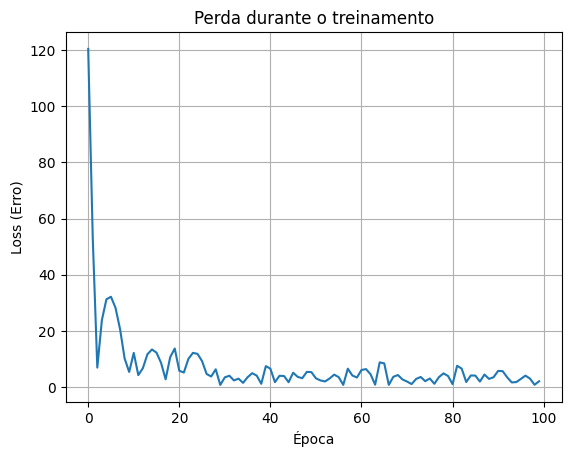

In [30]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

## 9️⃣ Avaliação do Modelo no Conjunto de Teste

In [31]:
with torch.no_grad():

    # Submete os dados de teste ao modelo
    logits_test = model(X_test_t)
    #print (logits_test)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)
    #print (probs_test)

    # prob > 0.5 => classe = 1 (Bom)
    #print ((probs_test > 0.5).float())

    # Verifica a probabilidade é maior que 0.5
    # se for atribui 1, senão 0 
    preds_test = (probs_test > 0.5).float()

    # Verifica o total de acertos
    acertos = (preds_test == y_test_t).sum().item()

    # Verifica a quantidade de elementos do grupo de teste
    total = y_test_t.shape[0]

    # calcula a taxa de acerto
    acuracia_test = acertos / total * 100.0

print(f"Qtd de Elementos  : {acertos:-6.2f}")
print(f"Qtd de Acertos    : {total:-6.2f}")
print(f"Acurácia no teste : {acuracia_test:-6.2f}%")

Qtd de Elementos  : 389.00
Qtd de Acertos    : 600.00
Acurácia no teste :  64.83%


### 🚨 Etapas da Avaliação:


1. **Previsões no conjunto de teste**
2. **Conversão de logits para probabilidades** com `sigmoid`
3. **Classificação final** usando limiar de 0.5
4. **Cálculo da acurácia**: percentual de previsões corretas


### 🎯 Resultado:

- Mostra a **porcentagem de acerto** do modelo nos dados de teste.

# 📝 Resumo Final

| Etapa | Descrição |
|-------|-----------|
| Carregar dados | Usamos `pd.read_csv()` |
| Limpeza de dados | Substituímos valores ausentes |
| Preparação do target | Criamos uma variável binária |
| Divisão de dados | Usamos `train_test_split` |
| Conversão para tensores | Compatibilizamos com PyTorch |
| Definição do modelo | Rede neural simples com duas camadas |
| Treinamento | Usamos loop com forward/backward propagation |
| Avaliação | Calculamos a acurácia no conjunto de teste |





---



